In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [209]:
df = pd.read_csv('/Users/sa10/Downloads/Music-Recommendation-Algorithm/Music-Recommendation-Algorithm/data/new_df.csv')

In [210]:
df.head()

,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.0
1,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.0
2,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.0
3,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.0
4,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.0


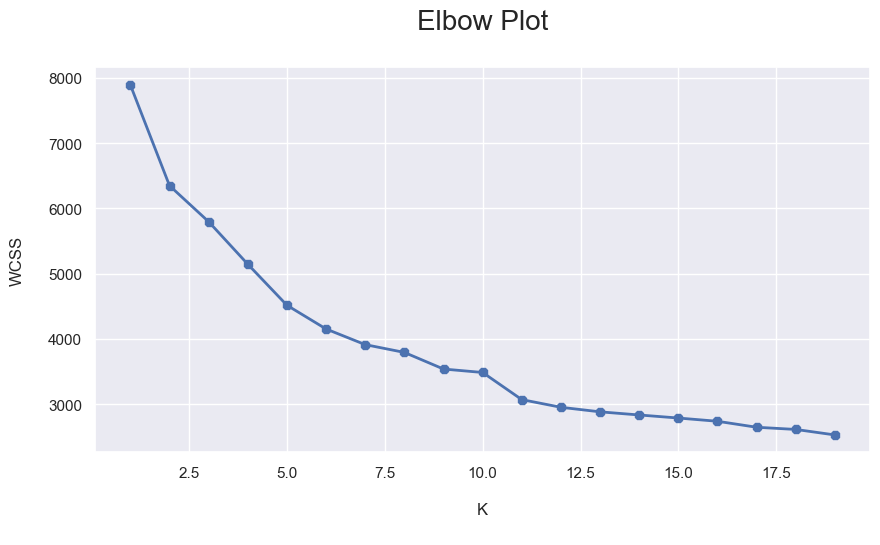

In [211]:
X1 =df.loc[:, ['dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual', 'sadness', 'feelings', 'age']].values

wcss = []

for k in range(1,20):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (10, 5))
sns.set(style="darkgrid")
plt.plot(range(1, 20), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('\nK\n')
plt.ylabel('WCSS\n')
plt.show()

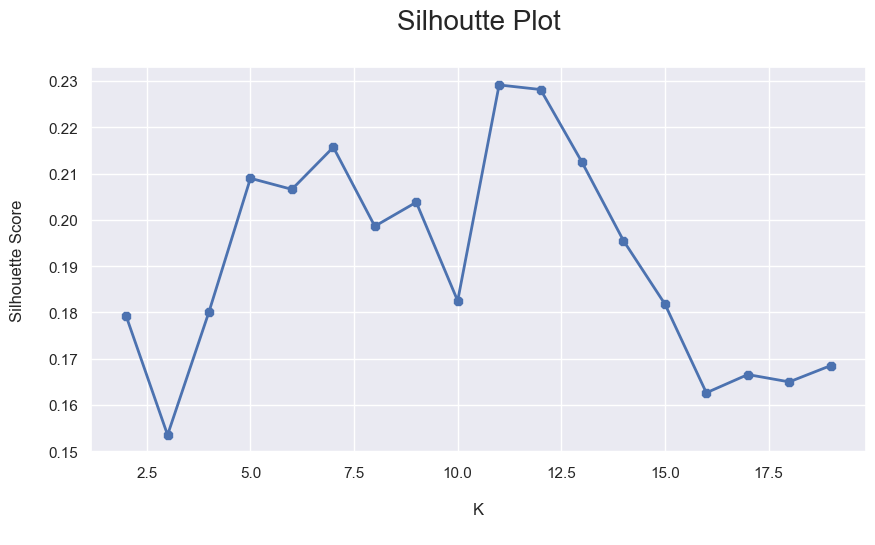

In [212]:
silhouette = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state=42)
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))

plt.figure(figsize = (10, 5))
sns.set(style="darkgrid")
plt.plot(range(2, 20), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('\nK\n')
plt.ylabel('Silhouette Score\n')
plt.show()

In [213]:
kmeans = KMeans(n_clusters=11, init = "k-means++", n_init=20, random_state =42)
kmeans.fit(X1)

KMeans(n_clusters=11, n_init=20, random_state=42)

In [214]:
labels = kmeans.fit_predict(X1)
labels

array([4, 3, 7, ..., 2, 2, 2], dtype=int32)

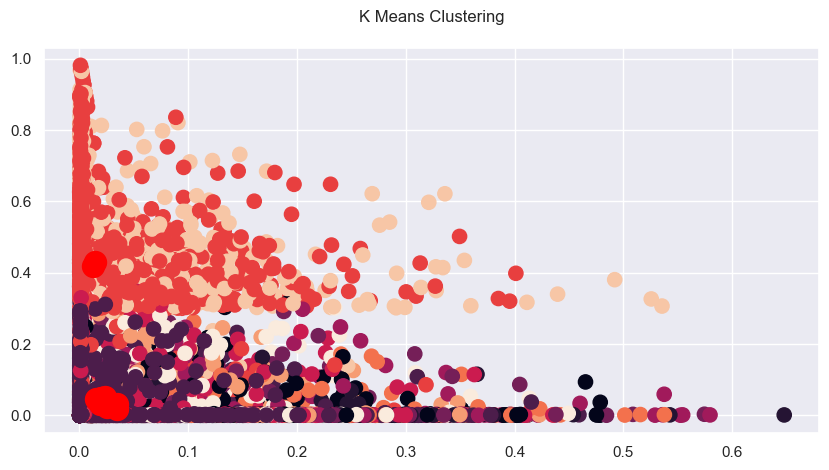

In [215]:
plt.figure(figsize = (10, 5))
plt.scatter(X1[:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('K Means Clustering\n')
plt.show()

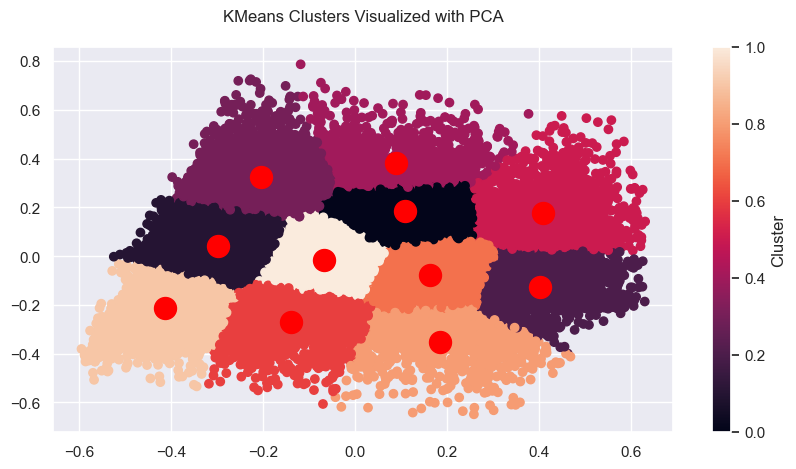

[0.26911167 0.14161009]
0.41072175543251965


In [216]:
pca = PCA(n_components=2)
transformed_pca = pca.fit_transform(X1)

kmeans_scaled = KMeans(n_clusters=11, random_state=42)
clusters = kmeans_scaled.fit_predict(transformed_pca)

plt.figure(figsize=(10, 5))
plt.scatter(transformed_pca[:,0], transformed_pca[:,1], c=clusters)
plt.scatter(kmeans_scaled.cluster_centers_[:,0], kmeans_scaled.cluster_centers_[:,1], color="red", s=250)
plt.title("KMeans Clusters Visualized with PCA\n")
plt.colorbar(label="Cluster")
plt.show()

print(f"{pca.explained_variance_ratio_}")
print(f"{sum(pca.explained_variance_ratio_)}")

In [217]:
kmeans = KMeans(n_clusters=11, init="k-means++", n_init=20, random_state=42)
labels = kmeans.fit_predict(X1)

In [218]:
df = pd.read_csv("/Users/sa10/Downloads/Music-Recommendation-Algorithm/Music-Recommendation-Algorithm/data/train.csv")
df['cluster'] = labels

df.to_csv("/Users/sa10/Downloads/Music-Recommendation-Algorithm/Music-Recommendation-Algorithm/data/train_cluster.csv", index=False)

df.info()
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28362 entries, 0 to 28361
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28362 non-null  int64  
 1   artist_name               28362 non-null  object 
 2   track_name                28362 non-null  object 
 3   release_date              28362 non-null  int64  
 4   genre                     28362 non-null  object 
 5   lyrics                    28362 non-null  object 
 6   len                       28362 non-null  int64  
 7   dating                    28362 non-null  float64
 8   violence                  28362 non-null  float64
 9   world/life                28362 non-null  float64
 10  night/time                28362 non-null  float64
 11  shake the audience        28362 non-null  float64
 12  family/gospel             28362 non-null  float64
 13  romantic                  28362 non-null  float64
 14  commun

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age,cluster
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,sadness,1.000000,4
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,world/life,1.000000,3
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,music,1.000000,7
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,romantic,1.000000,1
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,romantic,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,82447,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,78,0.001350,0.001350,0.001350,...,0.391651,0.001350,0.435089,0.001350,0.001350,0.065664,0.001350,obscene,0.014286,2
28358,82448,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,67,0.001284,0.001284,0.035338,...,0.318910,0.058152,0.134955,0.001284,0.001284,0.001284,0.001284,obscene,0.014286,2
28359,82449,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,0.001504,0.154302,0.168988,...,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,obscene,0.014286,2
28360,82450,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,67,0.001196,0.001196,0.001196,...,0.492434,0.103614,0.001196,0.202659,0.001196,0.001196,0.001196,obscene,0.014286,2


In [219]:
df['cluster'].value_counts().sort_index()

cluster
0     1832
1     1467
2     3207
3     2734
4     3106
5     2948
6     3215
7     2174
8     1777
9     2704
10    3198
Name: count, dtype: int64

In [220]:
kmeans.cluster_centers_

array([[0.03492454, 0.03122661, 0.03891173, 0.38983212, 0.01985917,
        0.01798903, 0.03116058, 0.08374184, 0.02342509, 0.02760879,
        0.04810001, 0.0446865 , 0.01745344, 0.04165052, 0.05628938,
        0.44478996],
       [0.03465775, 0.01889214, 0.04913301, 0.0409179 , 0.01590273,
        0.01924523, 0.39783264, 0.08521732, 0.01197442, 0.03786977,
        0.02467364, 0.06016018, 0.01675181, 0.04897187, 0.05015653,
        0.65079365],
       [0.01972832, 0.0494666 , 0.03988819, 0.02925945, 0.02660376,
        0.01635823, 0.01395506, 0.06833383, 0.46253003, 0.02325761,
        0.06460002, 0.02738167, 0.01515855, 0.02365267, 0.02250941,
        0.1544835 ],
       [0.0193416 , 0.03239631, 0.4294335 , 0.03432101, 0.01334933,
        0.01656666, 0.03869544, 0.07763096, 0.0162368 , 0.03558455,
        0.04084303, 0.05552257, 0.02775238, 0.06148891, 0.02943767,
        0.66980413],
       [0.02531366, 0.02391883, 0.05237045, 0.03664994, 0.01193719,
        0.01690561, 0.04672065, 

In [221]:
# Make sure your number of clusters matches
clusters = pd.DataFrame(
    columns=[f'cluster{i+1}' for i in range(11)],
    index=['dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual', 'sadness', 'feelings', 'age']
)

# Loop only over 11 clusters
for i in range(11):
    clusters[f'cluster{i+1}'] = kmeans.cluster_centers_[i]

clusters

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,cluster11
dating,0.034925,0.034658,0.019728,0.019342,0.025314,0.015478,0.012415,0.025084,0.023865,0.014659,0.020942
violence,0.031227,0.018892,0.049467,0.032396,0.023919,0.046863,0.418820,0.026455,0.050422,0.430018,0.048993
world/life,0.038912,0.049133,0.039888,0.429434,0.052370,0.401903,0.052517,0.038620,0.040704,0.052262,0.053799
night/time,0.389832,0.040918,0.029259,0.034321,0.036650,0.034656,0.034561,0.033449,0.030426,0.032391,0.038467
shake the audience,0.019859,0.015903,0.026604,0.013349,0.011937,0.017786,0.017610,0.015351,0.022373,0.015200,0.016305
family/gospel,0.017989,0.019245,0.016358,0.016567,0.016906,0.015318,0.014703,0.022491,0.021659,0.018344,0.013309
romantic,0.031161,0.397833,0.013955,0.038695,0.046721,0.032797,0.024709,0.026981,0.017971,0.022317,0.036616
communication,0.083742,0.085217,0.068334,0.077631,0.089146,0.076422,0.076208,0.063283,0.065416,0.066506,0.088586
obscene,0.023425,0.011974,0.462530,0.016237,0.013523,0.024711,0.027988,0.023277,0.442061,0.022098,0.021093
music,0.027609,0.037870,0.023258,0.035585,0.036248,0.030122,0.030943,0.418467,0.026491,0.024622,0.031687


<Axes: >

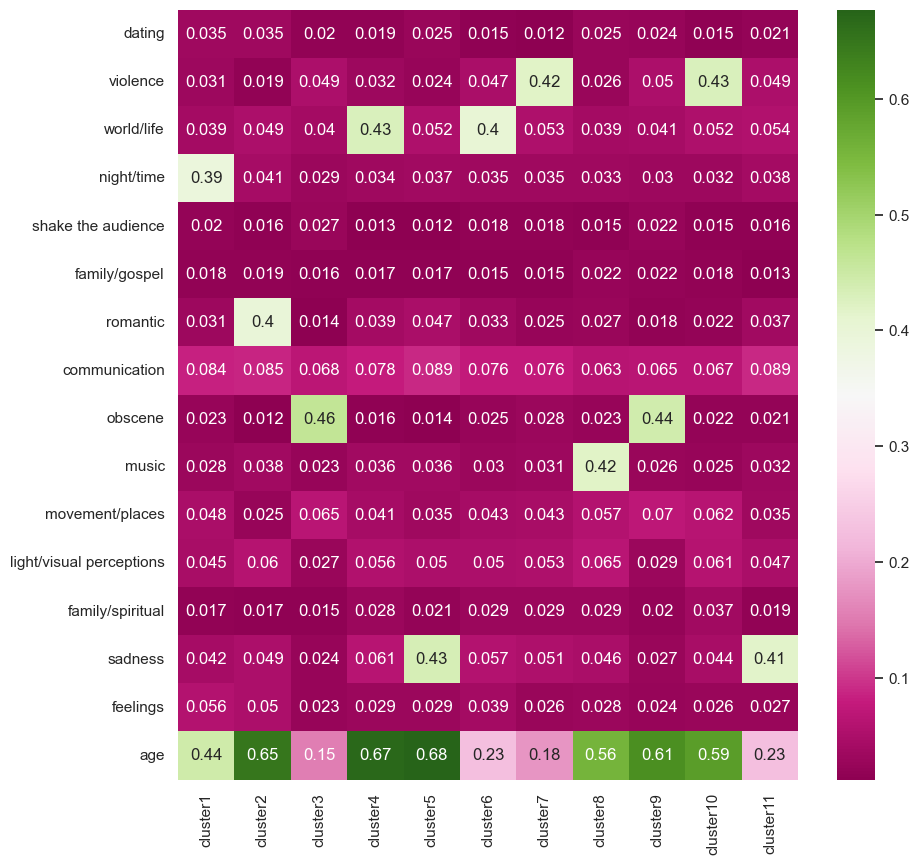

In [222]:
plt.figure(figsize=(10,10))
sns.heatmap(clusters, annot=True, cmap='PiYG')

In [223]:
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

kmeans_scaled = KMeans(n_clusters=11, random_state=42)
kmeans_scaled.fit(X1_scaled)

KMeans(n_clusters=11, random_state=42)

In [224]:
recommend_df = pd.read_csv("/Users/sa10/Downloads/Music-Recommendation-Algorithm/Music-Recommendation-Algorithm/data/recommend.csv")
recommend_df

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,topic,age,cluster
0,76885,godsmack,immune,1998,rock,come world society futher place home land deat...,74,0.000907,0.348191,0.375448,...,0.019389,0.000907,0.000907,0.000907,0.000907,0.000907,0.018854,world/life,0.314286,2
1,65394,dennis brown,second chance,1993,reggae,maybe maybe treat good feel second best girl s...,43,0.001224,0.029943,0.001224,...,0.001224,0.001224,0.001224,0.001224,0.056842,0.001224,0.062092,night/time,0.385714,4
2,10980,the black crowes,sister luck,1990,pop,worry sick eye hurt rest head life outside gir...,54,0.001120,0.482490,0.001120,...,0.001120,0.001120,0.078222,0.001120,0.051132,0.031571,0.202862,violence,0.428571,7
3,842,jerry lee lewis,your cheating heart,1960,pop,cheat heart weep sleep sleep come night cheat ...,25,0.204740,0.002506,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,sadness,0.857143,0
4,2764,paul anka,eso beso,1966,pop,beso kiss beso kiss know samba bossanova close...,97,0.001170,0.001170,0.001170,...,0.001170,0.001170,0.314626,0.001170,0.053731,0.001170,0.001170,romantic,0.771429,8
5,54425,noro morales,silencio,1952,jazz,fear dark fear thunder fear silence spirit dea...,57,0.001462,0.487965,0.140561,...,0.001462,0.001462,0.001462,0.077630,0.001462,0.001462,0.034645,violence,0.971429,1
6,77225,rage against the machine,pistol grip pump,2000,rock,pistolgrip pump time pistolgrip pump time pist...,152,0.000675,0.000675,0.134044,...,0.000675,0.000675,0.000675,0.024217,0.000675,0.000675,0.000675,obscene,0.285714,9
7,42962,taste,railway and gun,1970,blues,railway leave time choose tell tell lose throw...,37,0.051874,0.001645,0.001645,...,0.001645,0.001645,0.001645,0.001645,0.001645,0.314594,0.001645,sadness,0.714286,6
8,28825,randy travis,messin' with my mind,1986,country,say thing care hang long ahead leave start mes...,41,0.001504,0.001504,0.132148,...,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,night/time,0.485714,5
9,16881,paramore,playing god,2009,pop,decisions precision maybe want change simply a...,91,0.000711,0.543658,0.114697,...,0.000711,0.000711,0.000711,0.000711,0.000711,0.118886,0.015028,violence,0.157143,3


In [225]:
new_recommend = recommend_df.drop(['Unnamed: 0', 'artist_name', 'lyrics', 'track_name','genre', 'topic', 'like/girls', 'release_date'], axis=1)

features = ['dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual', 'sadness', 'feelings', 'age']

X_test = new_recommend[features].values
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

new_recommend['cluster'] = kmeans_scaled.predict(X_test_scaled)

In [226]:
new_recommend.info()
new_recommend.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   len                       10 non-null     int64  
 1   dating                    10 non-null     float64
 2   violence                  10 non-null     float64
 3   world/life                10 non-null     float64
 4   night/time                10 non-null     float64
 5   shake the audience        10 non-null     float64
 6   family/gospel             10 non-null     float64
 7   romantic                  10 non-null     float64
 8   communication             10 non-null     float64
 9   obscene                   10 non-null     float64
 10  music                     10 non-null     float64
 11  movement/places           10 non-null     float64
 12  light/visual perceptions  10 non-null     float64
 13  family/spiritual          10 non-null     float64
 14  sadness      

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,cluster
0,74,0.000907,0.348191,0.375448,0.000907,0.225414,0.000907,0.000907,0.000907,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.018854,0.314286,9
1,43,0.001224,0.029943,0.001224,0.306688,0.001224,0.033440,0.069637,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714,8
2,54,0.001120,0.482490,0.001120,0.001120,0.001120,0.113651,0.001120,0.001120,0.001120,0.001120,0.001120,0.078222,0.001120,0.031571,0.202862,0.428571,9
3,25,0.204740,0.002506,0.002506,0.129818,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,0.857143,10
4,97,0.001170,0.001170,0.001170,0.050289,0.001170,0.023530,0.541449,0.001170,0.001170,0.001170,0.001170,0.314626,0.001170,0.001170,0.001170,0.771429,2


In [227]:
new_recommend['cluster'].value_counts().sort_index()

cluster
2     1
3     1
8     2
9     4
10    2
Name: count, dtype: int64

In [228]:
# bringing back dropped column
clustercol = recommend_df[['genre', 'artist_name', 'track_name']]
df = pd.concat([clustercol, new_recommend], axis=1)

In [229]:
df[new_recommend['cluster']==2]

,genre,artist_name,track_name,len,dating,violence,world/life,night/time,shake the audience,family/gospel,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,cluster
4,pop,paul anka,eso beso,97,0.00117,0.00117,0.00117,0.050289,0.00117,0.02353,...,0.00117,0.00117,0.00117,0.00117,0.314626,0.00117,0.00117,0.00117,0.771429,2


In [230]:
df[new_recommend['cluster']==3]

,genre,artist_name,track_name,len,dating,violence,world/life,night/time,shake the audience,family/gospel,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,cluster
6,rock,rage against the machine,pistol grip pump,152,0.000675,0.000675,0.134044,0.293819,0.000675,0.000675,...,0.066012,0.460145,0.000675,0.000675,0.000675,0.024217,0.000675,0.000675,0.285714,3


In [231]:
df[new_recommend['cluster']==8]

,genre,artist_name,track_name,len,dating,violence,world/life,night/time,shake the audience,family/gospel,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,cluster
1,reggae,dennis brown,second chance,43,0.001224,0.029943,0.001224,0.306688,0.001224,0.033440,...,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714,8
8,country,randy travis,messin' with my mind,41,0.001504,0.001504,0.132148,0.492312,0.001504,0.001504,...,0.321439,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.485714,8


In [232]:
df[new_recommend['cluster']==9]

,genre,artist_name,track_name,len,dating,violence,world/life,night/time,shake the audience,family/gospel,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,cluster
0,rock,godsmack,immune,74,0.000907,0.348191,0.375448,0.000907,0.225414,0.000907,...,0.000907,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.018854,0.314286,9
2,pop,the black crowes,sister luck,54,0.001120,0.482490,0.001120,0.001120,0.001120,0.113651,...,0.001120,0.001120,0.001120,0.001120,0.078222,0.001120,0.031571,0.202862,0.428571,9
5,jazz,noro morales,silencio,57,0.001462,0.487965,0.140561,0.001462,0.001462,0.001462,...,0.238731,0.001462,0.001462,0.001462,0.001462,0.077630,0.001462,0.034645,0.971429,9
9,pop,paramore,playing god,91,0.000711,0.543658,0.114697,0.098286,0.014720,0.000711,...,0.075524,0.000711,0.000711,0.000711,0.000711,0.000711,0.118886,0.015028,0.157143,9


In [233]:
df[new_recommend['cluster']==10]

,genre,artist_name,track_name,len,dating,violence,world/life,night/time,shake the audience,family/gospel,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,cluster
3,pop,jerry lee lewis,your cheating heart,25,0.204740,0.002506,0.002506,0.129818,0.002506,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,0.857143,10
7,blues,taste,railway and gun,37,0.051874,0.001645,0.001645,0.084118,0.037341,0.001645,...,0.460564,0.001645,0.001645,0.001645,0.001645,0.001645,0.314594,0.001645,0.714286,10
